<a href="https://colab.research.google.com/github/solobala/ABD26/blob/main/MSD27_DZ3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Домашнее задание "Продвинутая линейная алгебра".

#### Уровень 0:
Задание 1
Дан объект в 
 пространстве
 При помощи линейных отображений:

Уменьшить объект в два раза
Повернуть на 130 градусов
Отразить объект относительно прямой y=x (поможет матрица [[0, 1, 0], [1, 0, 0], [0, 0, 1]])

In [1]:
import numpy as np
import matplotlib.pyplot as plt
A = np.array([])

In [46]:
def init(A):
  """
  Задаем исходную матрицу
  """
  A = np.array([
  [-100, -100, 1],
  [-100, 100, 1],
  [100, 100, 1],
  [0, 0, 1],
  [100, -100, 1],
  [-100, -100, 1]
  ])
  return(A)

In [47]:
def get_draw(A):
  """
  Инициализирует исходную матрицу.
  Выводит чертеж фигуры с вершинами,
  кoординаты которых содержатся в строках матрицы А.
  Возвращает матрицу
  """

  x = A[:,0]
  y = A[:,1]
  plt.plot(x, y)
  plt.ylim([-200, 200])
  plt.xlim([-200, 200])
  return(A) 

In [49]:
def get_stretch(x,y,z,A):
  """
  Выполняет растяжение - сжатие по осям x,y,z
  в соответствии с передаваемыми коэффициентами
  """
  B = np.array([[x,0,0],[0,y,0],[0,0,z]])
  res = B @ A.transpose()
  tt = res.transpose()
  get_draw(tt)

In [59]:
def get_turn(alfa,beta,gamma,A, direction):
  """
  Выполняет поворот матрицы A на заданный угол:
  alfa - вокруг оси х,
  beta - вокруг оси y,
  gamma - вокруг оси z
  direction -Направление вращения: True - по часовой стрелки, 
  False - против часовой стрелки
  """
  a = np.deg2rad(alfa) # переводим углы из градусов в радианы
  b = np.deg2rad(beta)
  c = np.deg2rad(gamma)
  a1 = np.cos(a)
  a2 = np.sin(a)
  b1 = np.cos(b)
  b2 = np.sin(b)
  c1 = np.cos(c)
  c2 = np.sin(c)
  if direction: # В зависимости от направления вращения, задаем матрицы поворота для каждой из осей
    M_alfa = np.array([
        [1, 0, 0],
        [0, a1, a2],
        [0, -a2, a1]
        ])
    M_beta = np.array([
        [b1, 0, -b2],
        [0, 1, 0],
        [b2, 0, b1]
        ]) 
    M_gamma = np.array([
        [c1, c2, 0],
        [-c2, c1, 0],
        [0, 0, 1]
        ]) 
  else:
    M_alfa = np.array([
        [1, 0, 0],
        [0, a1, -a2],
        [0, a2, a1]
        ])
    M_beta = np.array([
        [b1, 0, b2],
        [0, 1, 0],
        [-b2, 0, b1]
        ]) 
    M_gamma = np.array([
        [c1, -c2, 0],
        [c2, c1, 0],
        [0, 0, 1]
        ])
     
  B = M_alfa @ M_beta @ M_gamma   # считаем матрицу общую поворота  в 3-мерном пр-ве
 
  res = B @ A.transpose()
  tt = res.transpose() # результат поворота
  get_draw(tt) #  визуализация


In [86]:
def get_reflect(A):
  """
  Выполняет отражение матрицы А относительно оси y=x
  """
  B = np.array([
      [0, 1, 0],
      [1, 0, 0],
      [0, 0, 1]
      
  ])
  res = B @ A.transpose()
  tt = res.transpose() # результат поворота
  get_draw(tt) #  визуализация

array([[-100, -100,    1],
       [-100,  100,    1],
       [ 100,  100,    1],
       [   0,    0,    1],
       [ 100, -100,    1],
       [-100, -100,    1]])

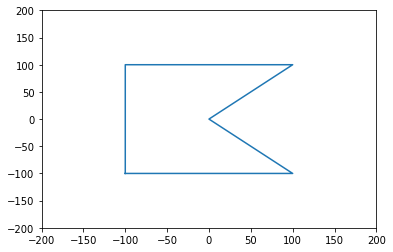

In [48]:
# Исходный рисунок
get_draw(init(A))

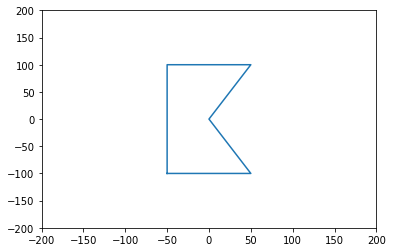

In [52]:
# уменьшим в 2 раза по оси х
get_stretch(0.5,1,1,init(A))

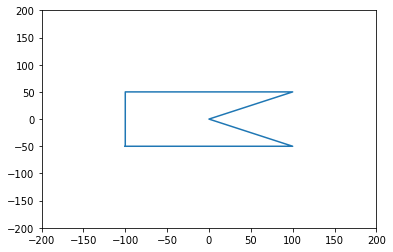

In [53]:
# уменьшим в 2 раза по оси y:
get_stretch(1,0.5,1,init(A))

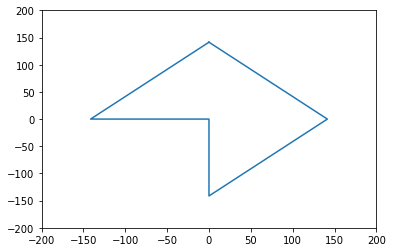

In [62]:
# Повернем на 135 градусов по часовой стрелки вокруг оси z
get_turn(0,0,135,init(A), True)

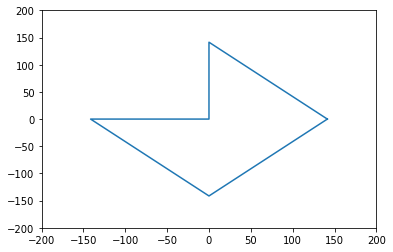

In [63]:
# Повернем на 135 градусов против часовой стрелки вокруг оси z
get_turn(0,0,135,init(A), False)

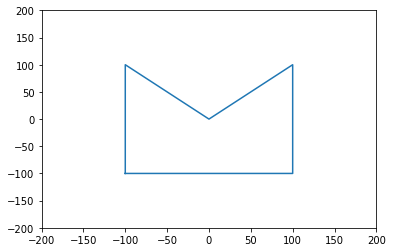

In [87]:
# выполним отражение  относительно прямой y=x 
get_reflect(init(A))

#### Уровень 1:
Задание 2
Найдите спектральное разложение матрицы:

m = np.array([[1, 2],
              [2, 3]])
print(m)

In [2]:
m = np.array([[1, 2], [2, 3]])

In [16]:
# находим собственные значения  и собственные вектора m
znach, vektors = np.linalg.eig(m)
znach, vektors

(array([-0.23606798,  4.23606798]), array([[-0.85065081, -0.52573111],
        [ 0.52573111, -0.85065081]]))

In [22]:
D=np.diag(znach) # диагональная матрица с собственным значениями m на главной диагонали
D

array([[-0.23606798,  0.        ],
       [ 0.        ,  4.23606798]])

In [23]:
St = vektors # Матрица, строки которой собственные вектора m
St

array([[-0.85065081, -0.52573111],
       [ 0.52573111, -0.85065081]])

In [24]:
S = np.transpose(vektors) # матрица, столбцы которой - собственные вектора m
S

array([[-0.85065081,  0.52573111],
       [-0.52573111, -0.85065081]])

In [25]:
np.dot(np.dot(St,D),S) # получаем исходную матрицу m - проверка

array([[1., 2.],
       [2., 3.]])